The data that we are going to use for this project is retrieved from `Google Cloud Big Query`.
we will use table `credit_card_default` from the dataset `ml_datasets` according to the instruction.

The query we used to retrieve the data is as follows:

```sql
SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month --Select specific columns from the table
FROM `bigquery-public-data.ml_datasets.credit_card_default` 
ORDER BY RAND () --get random data from the table
LIMIT 1996 --from my birth year * batch (1996 * 1 = 1996)
```

# Default Payment Prediction

## Content

1. Introduction
2. Import Libraries
3. Data Loading
4. Exploratory Data Analysis (EDA)
5. Data Preprocessing
6. Model Definition
7. Model Training
8. Model Evaluation
9. Model Inference
10. Conclusion

##  1. Introduction 

<h4 style="font-size:6;margin:20px">Name : Abdurrahman Shiddiq Thaha</h4>

### •  Problem Statement

Create a classification model to predict the `default_payment_next_month` with the saved datased.


## 2. Import Libraries 

These are libraries that are used in this assignment:

- pandas : Used to load and process data

- numpy : Used to do mathematical calculation necessary in the data analysis

- matplotlib : Used to visualize data

- seaborn : Used to do an alternative data visualization

- sklearn : Used to do machine learning procedure

- xgboost : used to perform modelling using XGBOOST model

- imblearn : used to do data imbalance handling

- scipy.stats : Used to do statistical calculation

- warnings : Used to ignore any warning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.feature_selection import f_classif, SelectKBest
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTENC
import scipy.stats as st
import warnings

warnings.simplefilter('ignore')

# enable inline plotting
%matplotlib inline

sns.set_style(style='white')

# set the max columns to none
pd.set_option('display.max_columns', None)

## 3. Data Loading 

We have been provided with 1 dataset . The description for what the dataset contain is given below: 


1. **h8dsft_P1M1_Abdurrahman_Shiddiq_Thaha.csv** : This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients of credit card clients in Taiwan from April 2005 to September 2005

### • Data Description

| Variable | Definition | Description |
| --- | --- | --- |
| limit_balance | Amount of given credit | in NT dollars (includes individual and family/supplementary credit) |
| sex | Gender  | 1=male, 2=female |
| education_level | Education level | 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown |
| marital_status | Marital status | 1=married, 2=single, 3=others |
| age | Age | in years |
| pay_0 | Repayment status in September, 2005 | -2=No consumption, -1=Paid in full, 0=The use of revolving credit 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above |
| pay_2 | Repayment status in August, 2005 | scale same as above |
| pay_3 | Repayment status in July, 2005 | scale same as above |
| pay_4 | Repayment status in June, 2005 | scale same as above |
| pay_5 | Repayment status in May, 2005 | scale same as above |
| pay_6 | Repayment status in April, 2005 | scale same as above |
| bill_amt_1 | Amount of bill statement in September, 2005 | in NT dollar |
| bill_amt_2 | Amount of bill statement in August, 2005 | in NT dollar |
| bill_amt_3 | Amount of bill statement in July, 2005 | in NT dollar |
| bill_amt_4 | Amount of bill statement in June, 2005 | in NT dollar |
| bill_amt_5 | Amount of bill statement in May, 2005 | in NT dollar |
| bill_amt_6 | Amount of bill statement in April, 2005 | in NT dollar |
| pay_amt_1 | Amount of previous payment in September, 2005 | in NT dollar |
| pay_amt_2 | Amount of previous payment in August, 2005 | in NT dollar |
| pay_amt_3 | Amount of previous payment in July, 2005 | in NT dollar |
| pay_amt_4 | Amount of previous payment in June, 2005 | in NT dollar |
| pay_amt_5 | Amount of previous payment in May, 2005 | in NT dollar |
| pay_amt_6 | Amount of previous payment in April, 2005 | in NT dollar |
| default_payment_next_month | Default payment | 1=yes, 0=no |


In [2]:
# Loading data
df = pd.read_csv('h8dsft_P1M1_Abdurrahman_Shiddiq_Thaha.csv')

In [3]:
# Duplicate Dataset
df_copy = df.copy()

In [4]:
# Checking the shape of the dataset
df_copy.shape

(1996, 24)

This dataset has 1996 rows and 24 columns (1 Target and 23 features)

In [5]:
# Look at the first 3 rows
df_copy.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,300000,2,2,1,42,0,0,0,0,0,0,168796,165430,147077,127270,129397,132142,7010,6000,5006,5000,5000,6000,0
1,100000,2,2,1,36,1,2,2,2,2,0,32196,31379,33862,35007,34147,35437,0,3000,2000,0,2000,3500,1
2,10000,2,1,2,23,3,2,2,7,7,7,2400,2400,2400,2400,2400,2400,0,0,0,0,0,0,1


In [6]:
# Look at the last 3 rows
df_copy.tail(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1993,360000,2,1,2,30,-2,-2,-2,-2,-2,-2,4765,3415,1539,6501,3458,2786,3434,1546,6541,3475,2788,5710,0
1994,90000,2,1,1,44,-1,-1,-2,-2,-2,-2,539,0,0,0,0,0,0,0,0,0,0,0,0
1995,80000,1,6,1,54,0,0,0,0,0,0,61454,61808,62290,29296,26210,17643,2545,2208,1336,2232,542,348,1


In [7]:
# Show concise summary of the data
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               1996 non-null   int64
 1   sex                         1996 non-null   int64
 2   education_level             1996 non-null   int64
 3   marital_status              1996 non-null   int64
 4   age                         1996 non-null   int64
 5   pay_0                       1996 non-null   int64
 6   pay_2                       1996 non-null   int64
 7   pay_3                       1996 non-null   int64
 8   pay_4                       1996 non-null   int64
 9   pay_5                       1996 non-null   int64
 10  pay_6                       1996 non-null   int64
 11  bill_amt_1                  1996 non-null   int64
 12  bill_amt_2                  1996 non-null   int64
 13  bill_amt_3                  1996 non-null   int64
 14  bill_amt

- there are no column that have null values
- there are 24 columns int64 datatype

###  Checking for duplicate

In [8]:
# Checking if the dataset have duplicate
df_copy.shape[0] - df_copy.drop_duplicates().shape[0]

1

We have 1 duplicate data

In [9]:
# dropping duplicate data
df_copy.drop_duplicates(ignore_index=True, inplace=True)

In [10]:
df_copy.shape

(1995, 24)

After dropping the duplicates, we have dataset with 1995 rows and 14 columns (1 Target and 13 features)

#### • Change target column's name

In [11]:
df_copy.rename({'default_payment_next_month': 'target'}, axis=1, inplace=True)
df_copy.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,target
0,300000,2,2,1,42,0,0,0,0,0,0,168796,165430,147077,127270,129397,132142,7010,6000,5006,5000,5000,6000,0
1,100000,2,2,1,36,1,2,2,2,2,0,32196,31379,33862,35007,34147,35437,0,3000,2000,0,2000,3500,1
2,10000,2,1,2,23,3,2,2,7,7,7,2400,2400,2400,2400,2400,2400,0,0,0,0,0,0,1


### • Splitting data train and data test

Splitting data into data train and test with a ratio of 80/20

In [12]:
# split train and test data
train, test = train_test_split(df_copy, test_size=0.2, random_state=420, stratify=df_copy['target'])

In [13]:
train.shape

(1596, 24)

In our data train we have 1596 rows and 24 columns (1 Target and 23 features)

In [14]:
test.shape

(399, 24)

In our data train we have 399 rows and 24 columns (1 Target and 23 features)

In [15]:
# Generate some descriptive statistics of numerical data
train.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,target
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1.596000e+03,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,167105.263158,1.614035,1.839599,1.559524,35.280075,0.002506,-0.140351,-0.163534,-0.220551,-0.266291,-0.296992,52426.450501,51379.721805,49506.983083,45446.974937,42384.003759,40964.625940,7104.063910,6.758506e+03,5651.830201,4686.939850,4824.186090,5724.615915,0.215539
std,123646.341445,0.486975,0.761510,0.520035,9.139319,1.147982,1.206711,1.215964,1.185166,1.158268,1.175834,71769.547539,71518.887764,69849.426537,63309.355804,60579.285332,59434.588472,25261.315391,3.484159e+04,16517.055673,14130.299359,16198.333992,19397.559788,0.411325
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-4577.000000,-27490.000000,-7941.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3587.500000,2775.500000,3268.000000,2500.000000,1674.000000,1279.000000,940.750000,7.800000e+02,400.000000,205.250000,219.000000,111.250000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24058.000000,22306.500000,21037.500000,20061.000000,18791.000000,18010.500000,2342.500000,2.268000e+03,2000.000000,1587.000000,1633.000000,1728.500000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72002.000000,69994.250000,67667.750000,64429.500000,57114.000000,55898.250000,5583.500000,5.085000e+03,5000.000000,4058.250000,4000.000000,4300.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,483184.000000,481382.000000,559712.000000,488808.000000,427064.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,184637.000000,300000.000000,403500.000000,1.000000


We can see above, it seems there is no anomaly in the dataset except all of pay category data which have a minimal value of -2. Based on the infomation provided in the dataset, the minimal value should be -1 which means pay duly status, but we can just assume that there is another category in pay category data.

In [16]:
train.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,target
230,100000,2,2,2,25,0,0,2,0,0,0,87401,93476,91077,92885,94831,96907,7497,0,3324,3442,3653,4449,1
334,50000,2,2,1,29,2,3,2,0,0,0,50136,50044,46543,19359,17850,18203,1000,5,661,770,800,763,1
914,120000,1,2,2,38,0,0,0,0,0,0,116399,117514,111003,84840,86954,83448,5000,5000,3000,3500,3000,82000,1


## 4. Exploratory Data Analysis (EDA)

There are 2 datatypes in the dataset:

1. Numerical : `limit_balance`, `age`, `bill_amt_1`, `bill_amt_2`, `bill_amt_3`, `bill_amt_4`, `bill_amt_5`, `bill_amt_6`, `pay_amt_1`, `pay_amt_2`, `pay_amt_3`, `pay_amt_4`, `pay_amt_5`, `pay_amt_6`.
2. Categorical : `sex`, `education_level`, `marital_status`, `target`.

For each datatype, we will do different data exploration

### • Numerical

For numerical data type, we will split the data into 3 groups and see the distribution of each column and correlation among each column plus the target


2. Bill : `bill_amt_1`, `bill_amt_2`, `bill_amt_3`, `bill_amt_4`, `bill_amt_5` & `bill_amt_6`
3. Pay Amount : `pay_amt_1`, `pay_amt_2`, `pay_amt_3`, `pay_amt_4`, `pay_amt_5` & `pay_amt_6`
4. Others : `limit_balance` & `age`

In [17]:
# defining a function to plot the distribution of data
def plot_numerical(df, feature, length=16, wide=14):
    fig, axes = plt.subplots(len(feature), 2, figsize=(length, wide))
    for c, ax in zip(feature, axes):
        skew = df[c].skew()
        
        _ = sns.histplot(x=df[c], ax=ax[0], bins=50)
        ax[0].set_title(f'Distribution of {c} (skewness = {skew:.3f})')
        
        
        _ = sns.boxplot(x=df[c], ax=ax[1])
        ax[1].set_title(f'''Boxplot of {c}''')
        sns.despine()
        
    plt.tight_layout()
    
# defining a function to plot the correlation of features and target
def plot_heatmap(df, feature, target):
    plt.figure(figsize=(10,6))
    
    _ = sns.heatmap(pd.concat([df[feature], df[target]], axis=1).corr(), annot=True, annot_kws={"fontsize":13});
    _.set_title(f'Correlation heatmap')

#### 1. Bill 

In [18]:
bill_col = ['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']

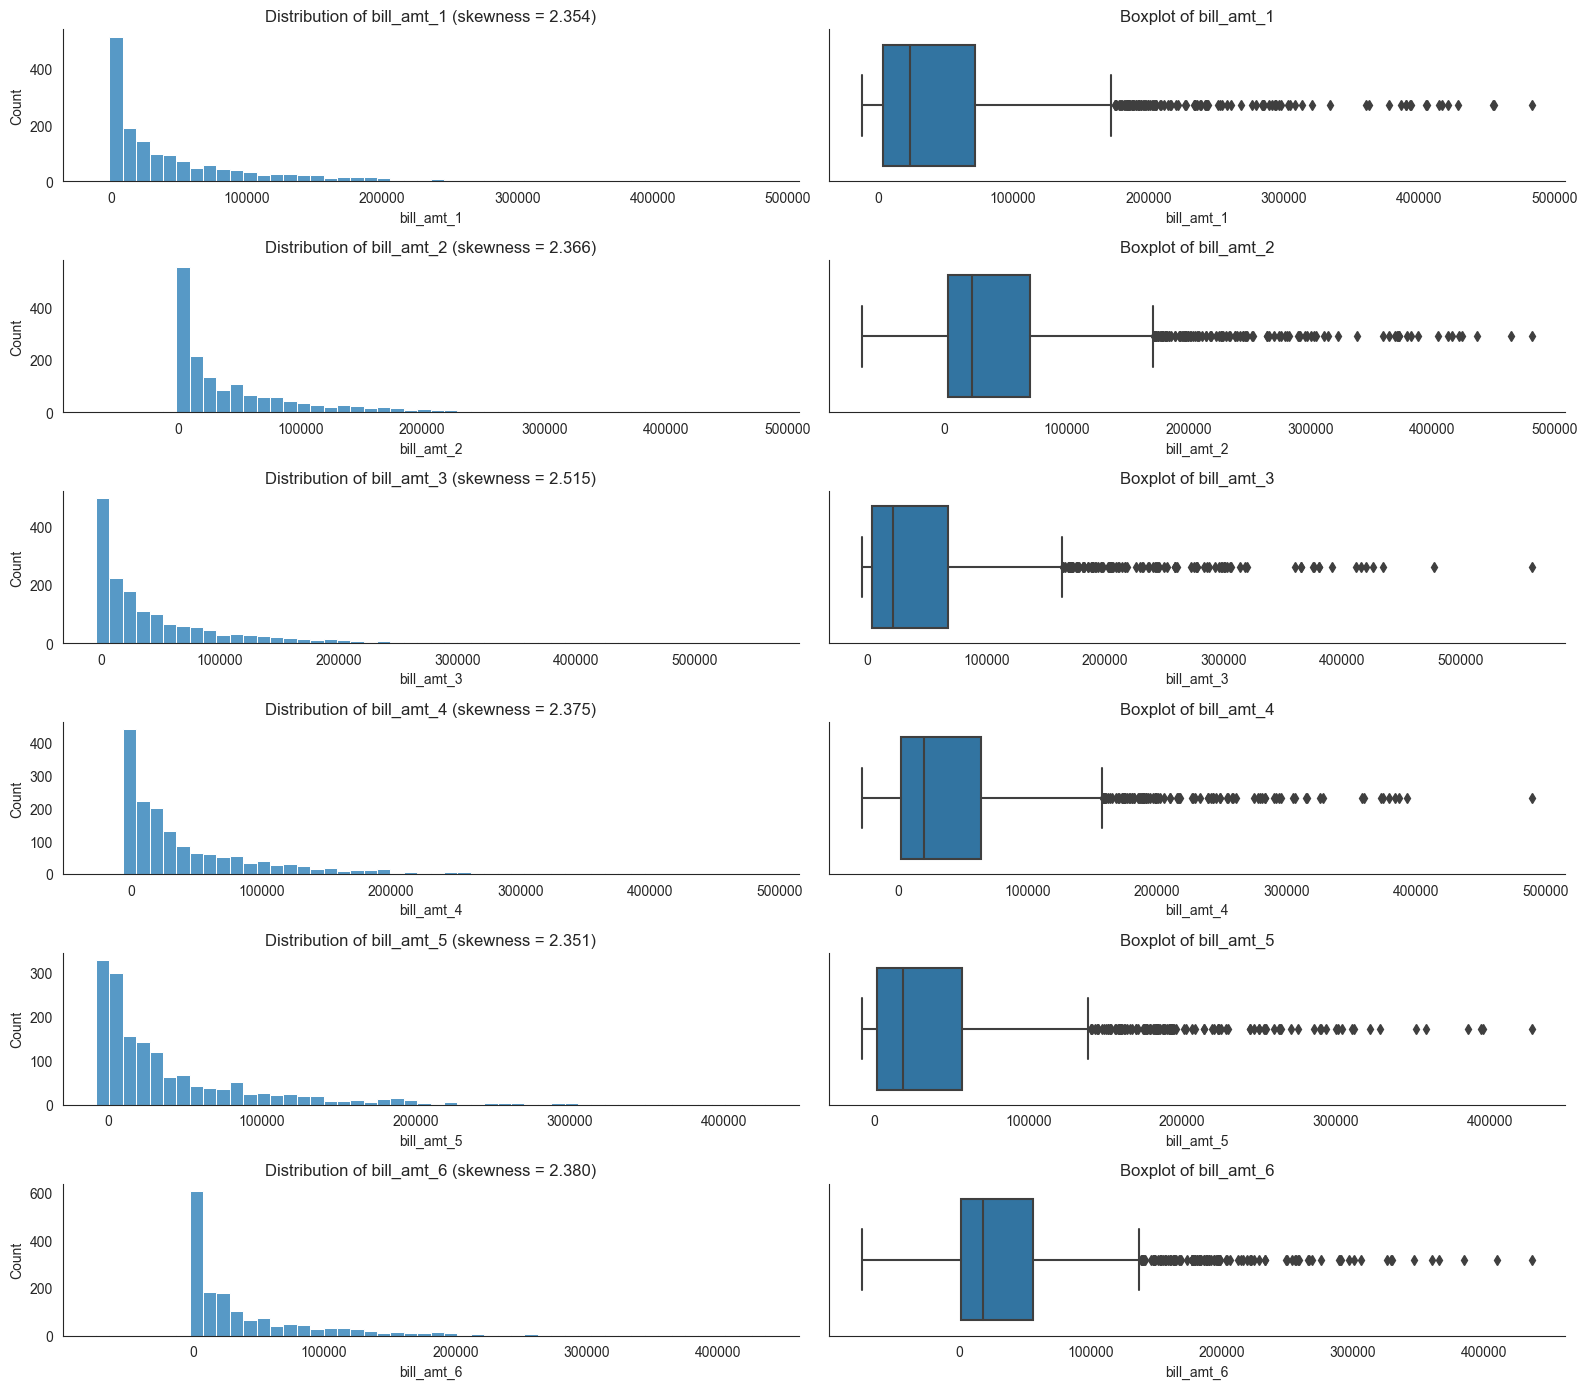

In [19]:
plot_numerical(train, bill_col)

As demonstrated above. we see that all of the features have extreme right-skewed distribution which is presented by the high positive value of skewness and how most of the data are gathered on the left side. Being extremely right-skewed, one of the consequneces is there are a lot of outliers as we can see with the boxplots.

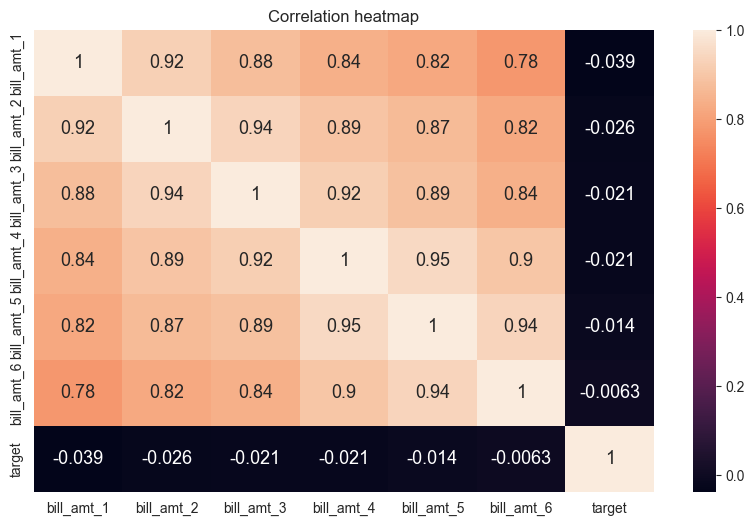

In [20]:
plot_heatmap(train, bill_col, 'target')

Based on the correlation heatmap above, We can see that there is not a single feature with a significant correlation to our target since all of their correlation are really close to **0**. However, it seems that there are considerable correlations between each feature.

#### 2. Pay Amount

In [21]:
pay_amount_col = ['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

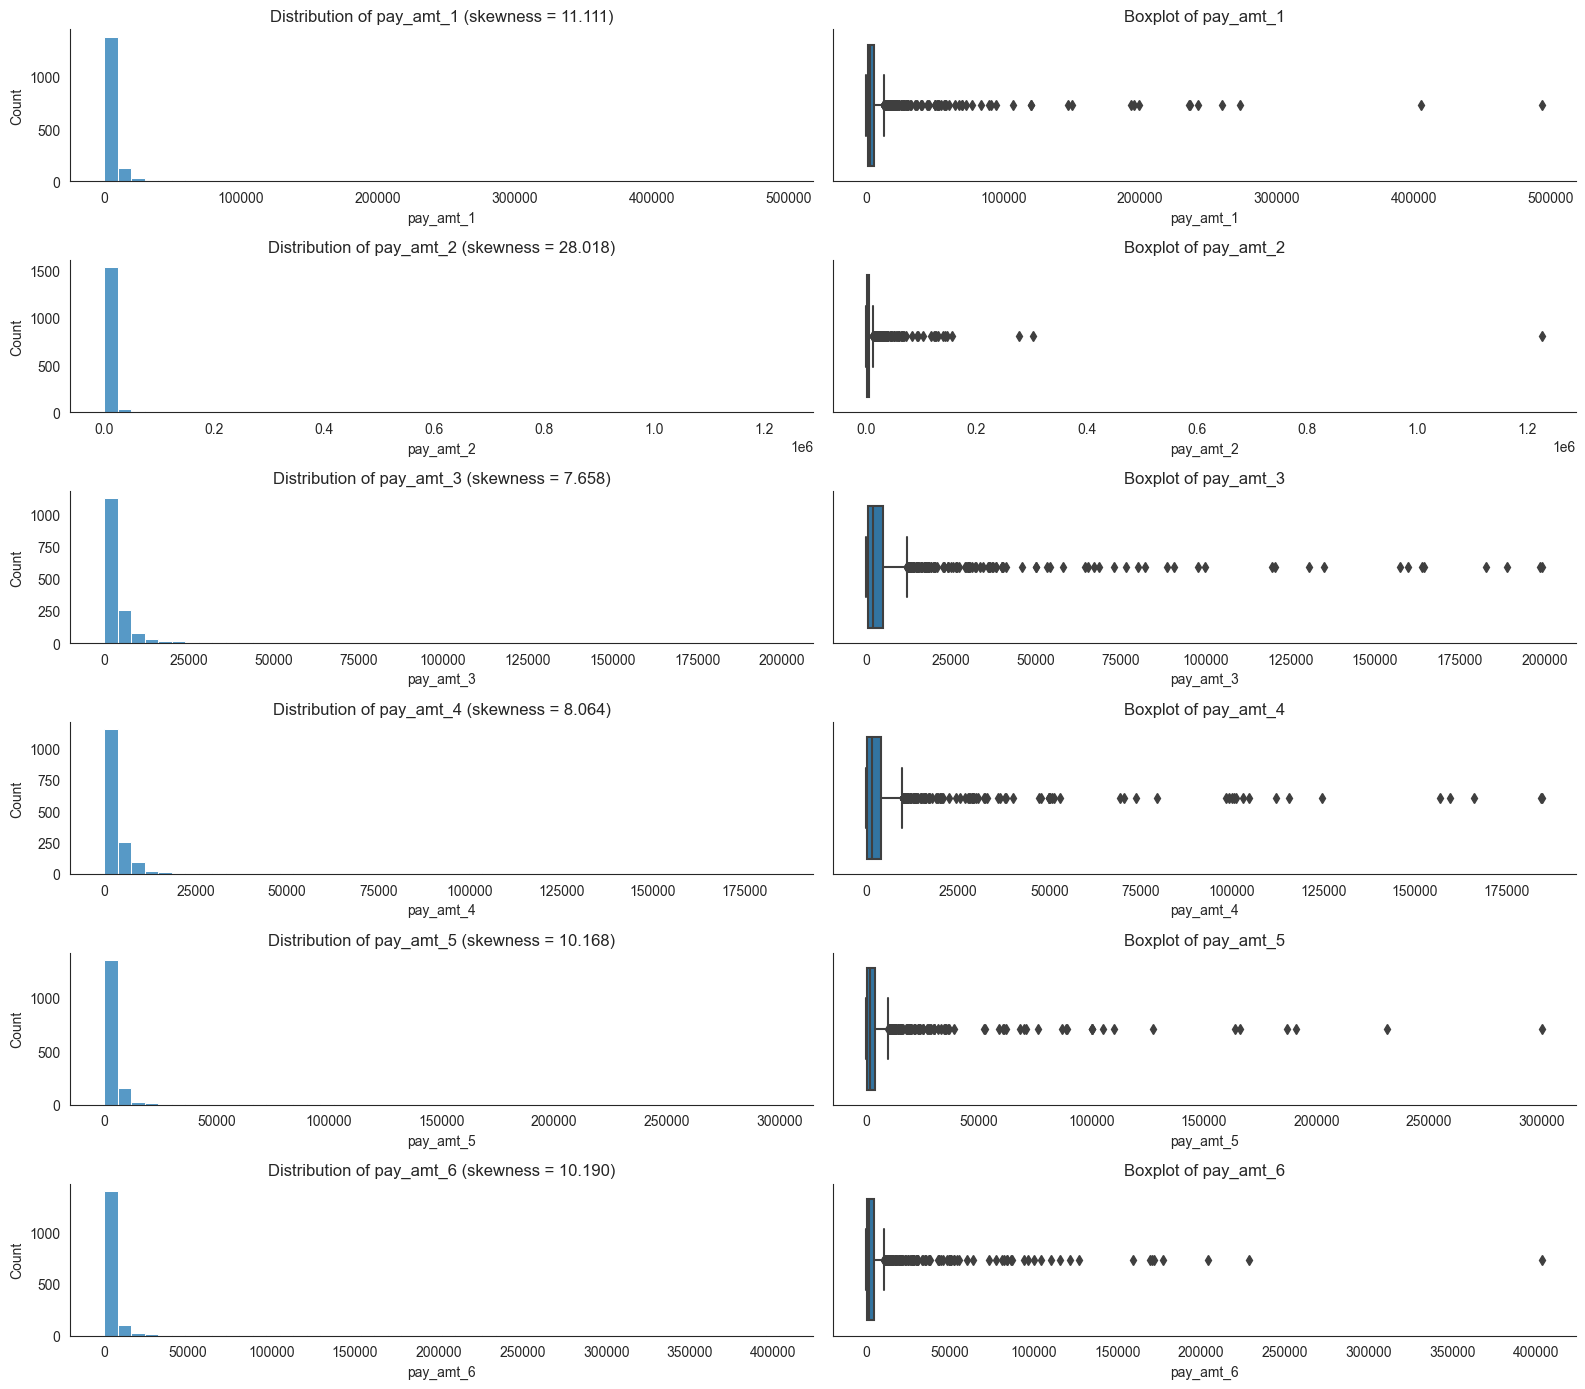

In [22]:
plot_numerical(train, pay_amount_col)

As can be seen above, we know that the entire features in this group are exceptionally right-skewed based on the histogram and the value of skewness. And obviously, with a distrubution that skewed we can expect that are a lot of outliers in the data which also can be recognize from the boxplots/

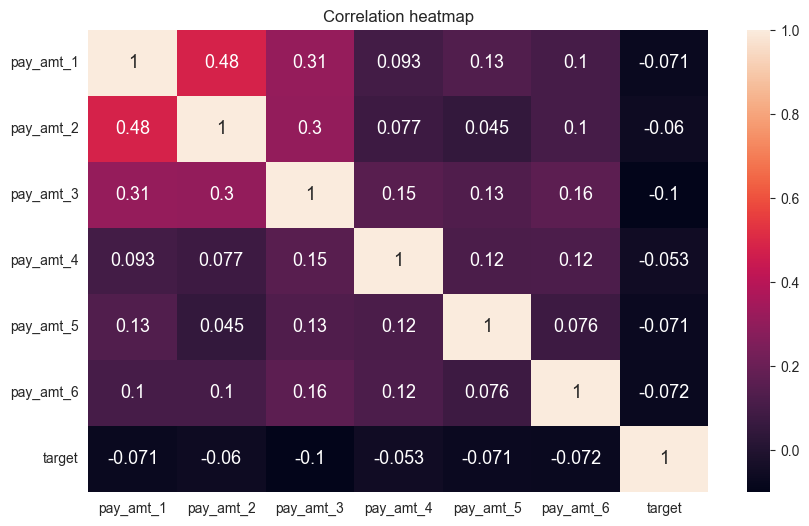

In [23]:
plot_heatmap(train, pay_amount_col, 'target')

Similar to the last one, the correlation between features in this group and our target are non existance. and apparently, there is some correlations amongst the features in this group.

#### 3. Others 

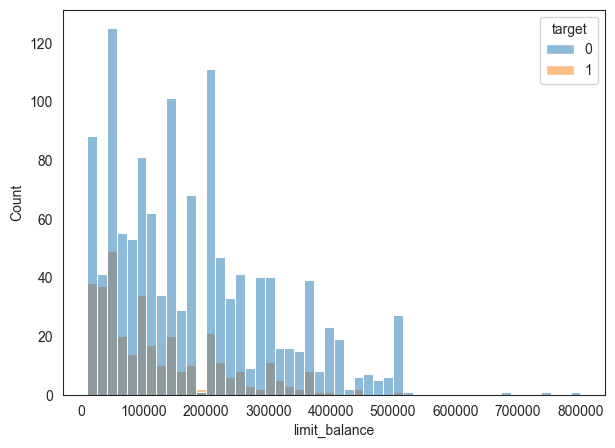

In [70]:
fig, ax = plt.subplots(1,1,figsize=(7,5))

_ = sns.histplot(x=train['limit_balance'], ax=ax, bins=50, hue=train['target'])

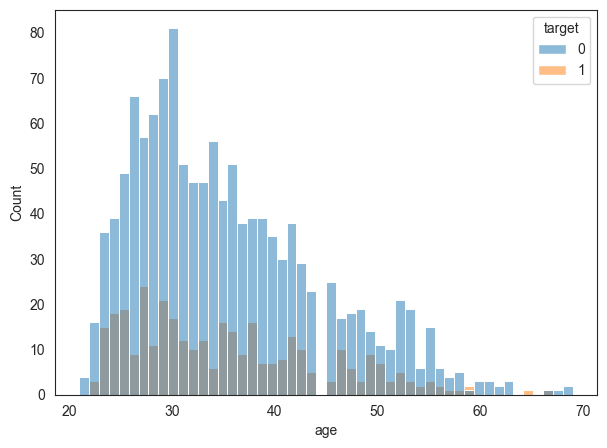

In [71]:
fig, ax = plt.subplots(1,1,figsize=(7,5))

_ = sns.histplot(x=train['age'], ax=ax, bins=50, hue=train['target'])

In [24]:
other_col = ['limit_balance', 'age']

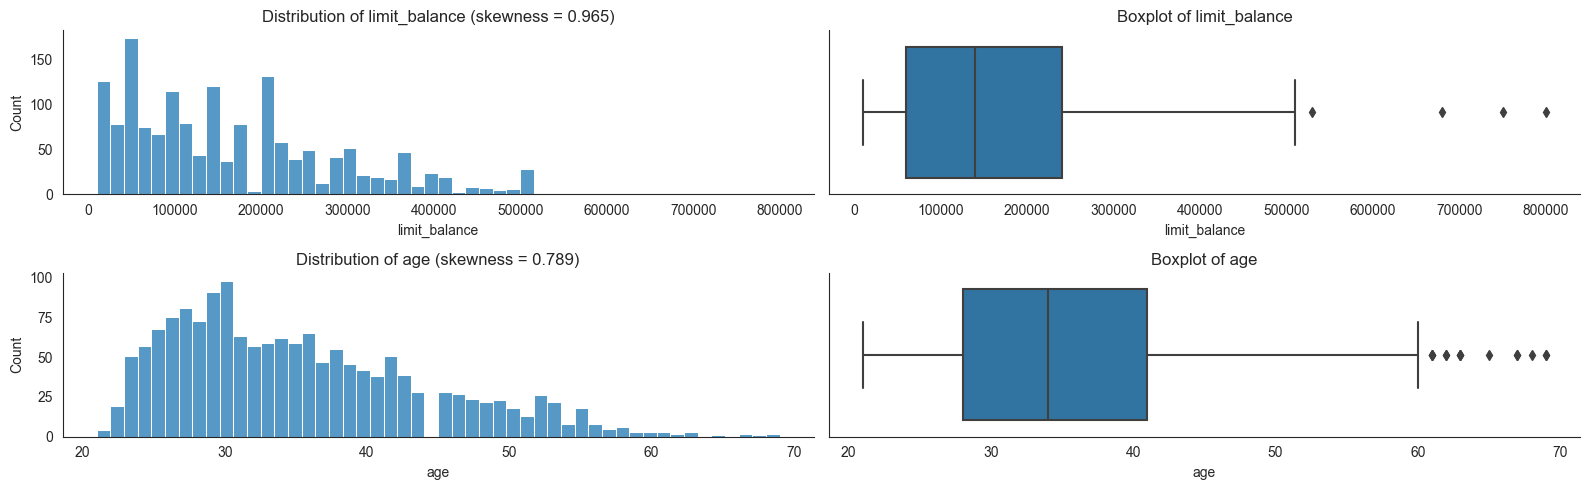

In [25]:
plot_numerical(train, other_col, 16, 5)

Arguably, according to the figure above, we can make an assertion that both `limit_balance` and `age` are normally distibuted although it appears that both of those features have some outliers seen in the boxplots.

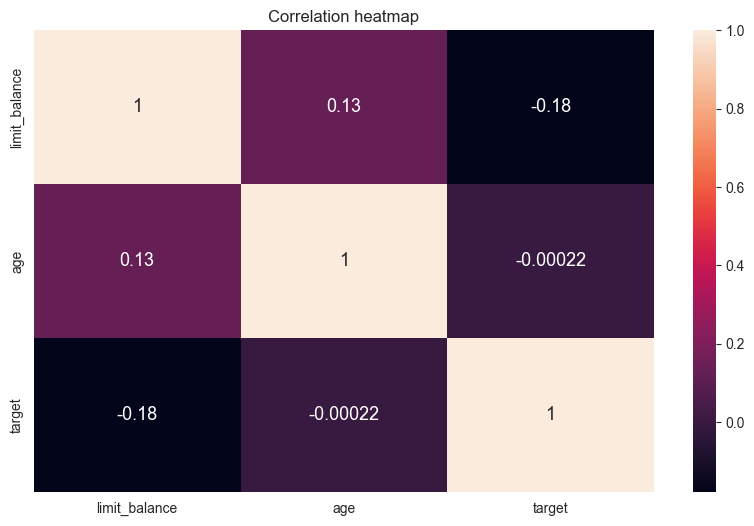

In [26]:
plot_heatmap(train, other_col, 'target')

interestingly, we have a somewhat significant negative correlation between `limit_balance` and our target, moreover if you compare it to the other numerical features.

### • Categorical

Target: , `target`.

Categorical Columns: `sex`, `education_level` & `marital_status`

For Categorical data type, we will see the distribution of each column and the correlation between each column and the target

In [27]:
target = ['target']
cat_cols = ['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

#### 1. Target

In [28]:
# define a function to visualize target distribution
def target_dist(df, target):
    plt.figure(figsize=(7,5))

    _ = sns.countplot(x=df[target])
    _.bar_label(_.containers[0]);

    pct_0 = df[target].value_counts()[0]*100 / df.shape[0]

    _.set_xticklabels([f'0 ({pct_0:.2f}%)', f'1 ({100-pct_0:.2f}%)']);
    _.set_title(f'Target Distribution')
    _.grid(False)
    sns.despine()

    plt.tight_layout;

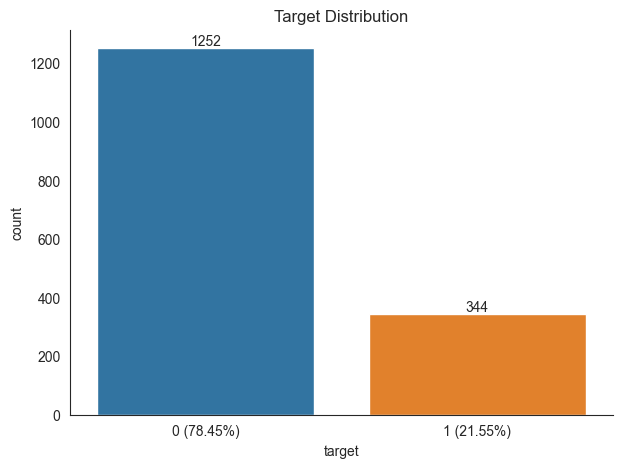

In [29]:
target_dist(train, 'target')

As we can look above, the proportion of label in our target is fairly imbalance. We only have **345** data that is considered label `1` which makes it minority class compared to **1251** of data which is considered as label `0` which we call as majority class. with that proportion, this circumstance is fall under the category of **mild imbalance**.

#### 2. Categorical

In [30]:
# create a function to only show the label when it's > 5%
def autopct(pct): 
    return ('%1.1f%%' % pct) if pct > 5 else ''

# defining a function to plot a pie chart
def pie_chart(df, feature):
    fig, axes = plt.subplots(int(len(feature)/3), 3, figsize=(16,14))

    # flat the axes to be in one line of list
    axes = axes.flatten()
    
    # Use for loop to plot all of the categorical data into pie chart
    for c, ax in zip(feature, axes):
        n_cat = df[c].nunique()
        _ = df[c].value_counts().sort_values(ascending=False).plot(kind='pie', fontsize=10, autopct=autopct, ax=ax, title=f'{c} ({n_cat} categories)');
        _ = ax.set_ylabel('')
    _ = plt.tight_layout()

    

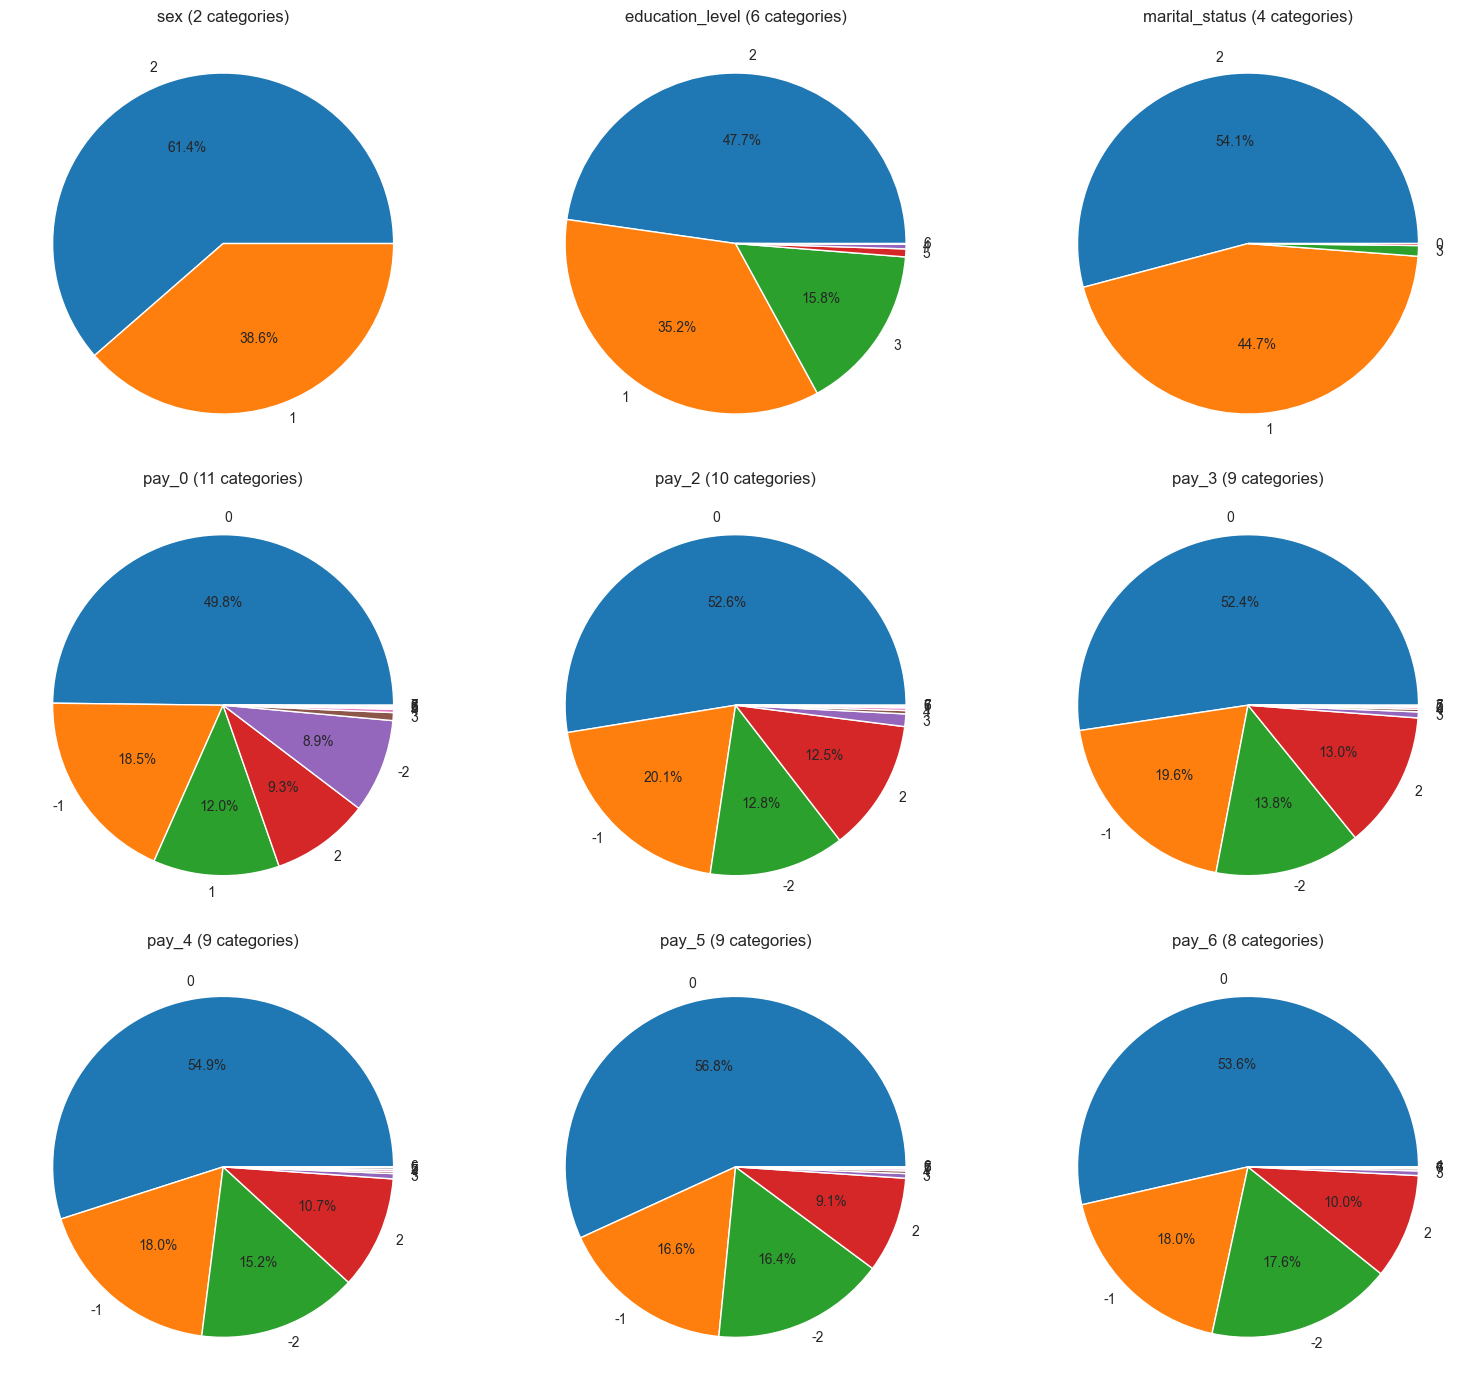

In [31]:
pie_chart(train, cat_cols)

As can be seen from visualizations above, we can see that there are 1 feature with a binary value, 1 feature with 4 possible categories, 1 feature with 6 possible categories, 3 features with 8 possible categories, 1 feature with 9 possible categories, 1 feature with 10 categories, and 1 feature with 11 possible categories. In addition of that we also notice there is a column that have a mild imbalance data which is `sex`.

In order to find correlation between the categorical features and our target which is categorical, we will use *chi-square test* with these hypothesis:

- H0 = The two categorical variables are unrelated/independent
- H1 = The two categorical variables are related/dependent


note : confidence level : **95%** / Critical Value : 1 - 0.95 = **0.05**

In [32]:
for c in cat_cols:
    
    # create a contingency table
    contingency_table = pd.crosstab(train[c], train['target'])
    
    # input contingency table to perform the test
    stat, p, dof, expected = st.chi2_contingency(contingency_table)
    print(f'\n{c} and target')
    print('p=%.3f' % (p))
    if p > 0.05:
        print(f'Probably independent')
    else:
        print(f'Probably dependent')


sex and target
p=0.829
Probably independent

education_level and target
p=0.008
Probably dependent

marital_status and target
p=0.740
Probably independent

pay_0 and target
p=0.000
Probably dependent

pay_2 and target
p=0.000
Probably dependent

pay_3 and target
p=0.000
Probably dependent

pay_4 and target
p=0.000
Probably dependent

pay_5 and target
p=0.000
Probably dependent

pay_6 and target
p=0.000
Probably dependent


From the output above, all of the test we have done using chi-square gave a result that `education_level`, `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, `pay_6` have a correlation with our target since all of the p-value from each their tests are smaller than our critical value = **0.05**.

### • Feature Selection

In [33]:
# Selecting feature based on the ANOVA test
feature_sel = SelectKBest(score_func=f_classif)

# fit the train
fit = feature_sel.fit(train.loc[:, train.columns != 'target'], train['target'])


f_select = pd.Series(fit.scores_)
f_select.index = train.loc[:, train.columns != 'target'].columns
f_select.sort_values(ascending=False)

pay_0              208.476218
pay_2              141.807608
pay_3              118.992202
pay_5              110.651108
pay_4              106.831931
pay_6               94.136146
limit_balance       52.642236
pay_amt_3           16.427190
pay_amt_6            8.394564
pay_amt_1            8.071729
pay_amt_5            8.004246
education_level      5.837313
pay_amt_2            5.738375
pay_amt_4            4.479775
bill_amt_1           2.415448
bill_amt_2           1.059851
bill_amt_4           0.734011
bill_amt_3           0.720941
bill_amt_5           0.296864
marital_status       0.274426
sex                  0.077529
bill_amt_6           0.064062
age                  0.000080
dtype: float64

Based in the Exploratory Data Analysis (EDA) that we have done, we consider to include these feature(s) to our model:

- `limit_balance` (Numerical): 

Have a relatively significant negative correlation with the target and high score of ANOVA tests.

- `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, `pay_6` (Ordinal Categorical)  : 

Have significant correlation with the target based on Chi-Square Test and high score of ANOVA tests.

In [34]:
# seperating features accoding to their datatype plus the target
feature_num = ['limit_balance']
feature_cat = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
target = ['target']

In [35]:
# select feature for train and test data
train_selected = train[feature_num + feature_cat + target]
test_selected = test[feature_num + feature_cat + target]
train_selected.head(3)

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,target
230,100000,0,0,2,0,0,0,1
334,50000,2,3,2,0,0,0,1
914,120000,0,0,0,0,0,0,1


In [36]:
print('Train Size : ', train_selected.shape)
print('Test Size  : ', test_selected.shape)

Train Size :  (1596, 8)
Test Size  :  (399, 8)


So we will create our model with 7 features and 1 target

## 6. Data Preprocessing

### • Data for model inference

In [37]:
# Get Data for Model Inference
df_inf = train_selected.sample(10, random_state=420)
df_inf.head(3)

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,target
1525,200000,3,2,2,2,2,2,1
371,100000,2,2,0,0,2,2,1
1639,140000,0,0,0,0,0,0,0


In [38]:
# Remove Inference-Set from Dataset
train_selected = train_selected.drop(df_inf.index)
train_selected.shape

(1586, 8)

we will have 1586 rows to be preprocessed

In [39]:
# Reset Index 
train_selected.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True)

### • Handling outliers

In [40]:
# Defining a function to analyze outlier in the data
def outlier_analysis(df, col):
    skewness = df[col].skew()
    # if the distribution is normal we will use Z-Score
    if skewness >= -0.5 and skewness<= 0.5:
        upper = df[col].mean() + 3*df[col].std()
        lower = df[col].mean() - 3*df[col].std()
        method = 'Z-Score'
    # if the distribution is not normal we will use IQR
    else:
        q3 = df[col].quantile(0.75)
        q1 = df[col].quantile(0.25)
        iqr = q3 - q1
        upper_bound = q3 + (iqr * 3)
        lower_bound = q1 - (iqr * 3)
        method = 'IQR'

    outlier = df.loc[(df[col] > upper_bound) | (df[col] < lower_bound)]
    
    return outlier, method, upper_bound, lower_bound

In [41]:
# using for loop to go through every numerical column and handle their outliers
for col in feature_num:
    out, method, up, low = outlier_analysis(train, col)
    pct_out = (len(out)/len(train))*100
    
    # if outliers percentage is under 5%, we will drop the data
    if pct_out <= 5:
        train_selected = train_selected[(train_selected[col]>=low) & (train_selected[col]<=up)]
    # if outliers percentage is over 10%, we will cap the outliers 
    else:
        train_selected[col] = train_selected[col].apply(lambda x: up if x>=up else low if x<=low else x)

In [42]:
train_selected.shape

(1585, 8)

After outliers handling, we are left with 1585 rows and 8 columns

### • Handling missing values

In [43]:
# Finding missing values
train_selected.isnull().sum()

limit_balance    0
pay_0            0
pay_2            0
pay_3            0
pay_4            0
pay_5            0
pay_6            0
target           0
dtype: int64

Since there is no missing values, we will not do any missing values handling

### • Splitting between `X` (Features) and `y` (Target)

In [44]:
# Split between Train-Set and Test-Set
X_train = train_selected[feature_num + feature_cat]
X_test = test_selected[feature_num + feature_cat]
y_train = train_selected[target]
y_test = test_selected[target]

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (1585, 7)
Test Size  :  (399, 7)


### • Splitting Numerical Columns and Categorical Columns

In [45]:
# Split between numerical and categorical features
X_train_num = X_train[feature_num]
X_train_cat = X_train[feature_cat]

X_test_num = X_test[feature_num]
X_test_cat = X_test[feature_cat]


### • Cardinalty Handling

In [46]:
# check cardinaly of each categorical feature
X_train_cat.nunique()

pay_0    11
pay_2    10
pay_3     9
pay_4     9
pay_5     9
pay_6     8
dtype: int64

As we can see above, all of the categorical features have arguably high cardinality.This is what we will do for each feature to handle the cardinality:

- `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, `pay_6`
    - label -2, -1, 0 -> 0
    , This is based on the consideration that label -2, -1 and 0 are basically the same meaning that there is no payment delay

In [47]:
for cat in feature_cat:
    X_train_cat[cat] = X_train_cat[cat].replace([-2, -1], 0)
    X_test_cat[cat] = X_test_cat[cat].replace([-2, -1], 0)

X_train_cat.nunique()

pay_0    9
pay_2    8
pay_3    7
pay_4    7
pay_5    7
pay_6    6
dtype: int64

After being handled, the cardinality our categorical features is relatively better.

### • Feature encoding

In [48]:
X_train_cat.head(3)

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,0,0,2,0,0,0
1,2,3,2,0,0,0
2,0,0,0,0,0,0


Since our categorical features is already encoded, we won't do any encoding anymore

### • Feature scaling

In [49]:
# finding the suitable scaling method for feature scaling
norm = 0
nonorm = 0
for col in X_train_num.columns:
    if X_train_num[col].skew() >=-0.5 and train[col].skew() <0.5:
        norm += 1
    else:
        nonorm +=1
        
    if norm > nonorm:
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler()
        
print(scaler)

MinMaxScaler()


We will use MixMax Scaler to do feature scaling

In [50]:
# Feature scaling using MinMax Scaler
scaled_X_train = scaler.fit_transform(X_train_num)
scaled_X_test = scaler.transform(X_test_num)

scaled_X_train

array([[0.12162162],
       [0.05405405],
       [0.14864865],
       ...,
       [0.2027027 ],
       [0.13513514],
       [0.05405405]])

### • Concate between numerical features and categorical features

In [51]:
# Concate Columns
X_train_final = np.concatenate([scaled_X_train, X_train_cat], axis=1)
X_test_final = np.concatenate([scaled_X_test, X_test_cat], axis=1)

In [52]:
# Create DataFrame of `X_train_final` and `X_test_final_df`
X_train_final_df = pd.DataFrame(X_train_final, columns=[feature_num+feature_cat])
X_test_final_df = pd.DataFrame(X_test_final, columns=[feature_num+feature_cat])
X_train_final_df


,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.121622,0.0,0.0,2.0,0.0,0.0,0.0
1,0.054054,2.0,3.0,2.0,0.0,0.0,0.0
2,0.148649,0.0,0.0,0.0,0.0,0.0,0.0
3,0.054054,0.0,0.0,0.0,0.0,0.0,0.0
4,0.027027,1.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...
1580,0.054054,0.0,0.0,0.0,0.0,0.0,0.0
1581,0.256757,0.0,0.0,0.0,0.0,0.0,0.0
1582,0.202703,2.0,2.0,0.0,0.0,2.0,2.0
1583,0.135135,0.0,0.0,0.0,0.0,0.0,0.0


### • Handling Target Imbalance

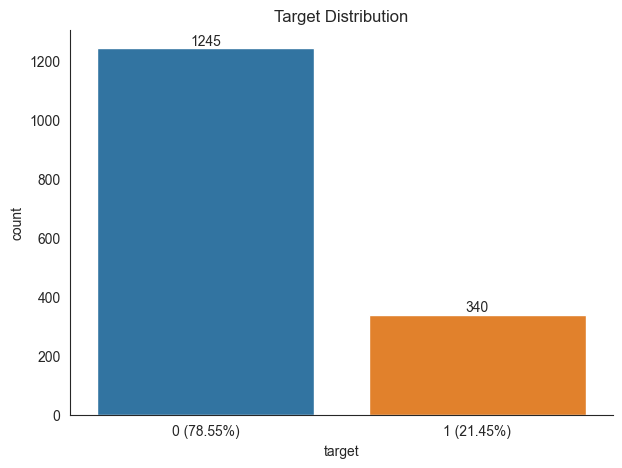

In [53]:
target_dist(y_train, 'target')

Based on the figure above, `we have a mild imbalanced data that we will handle.

In [54]:
# use SMOTENC to over sampling the data because we have categorical data in the features
smnc = SMOTENC(sampling_strategy='auto', random_state=420, categorical_features=[1, 2, 3, 4, 5, 6])
X_train_balanced, y_train_balanced = smnc.fit_resample(X_train_final_df, y_train)

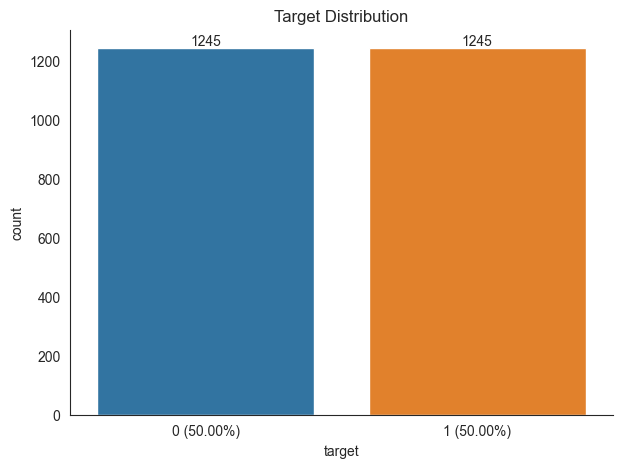

In [55]:
target_dist(y_train_balanced, 'target')

After being handled, the target now is balanced with 1245 rows for each target class.

In [56]:
X_train_balanced.shape

(2490, 7)

We will input 2490 rows and 6 features to our model.

## 7. Model Definition

The algorithms that will be used are 
- `LogisticRegression` 
- `SVM` 
- `Decision Tree` 
- `Random Forest` 
- `KNN` 
- `Naive Bayes` 
- `XGBOOS` 

Note: default setting.

In [57]:
# Initiate a Logistic Regression model
model_log_reg = LogisticRegression()

# Initiate a SVM model
model_SVC = SVC(probability=True)

# Initiate a Decision Tree model
model_DT = DecisionTreeClassifier()

# Initiate a Random Forest model
model_RF = RandomForestClassifier()

# Initiate a KNN model
model_KNN = KNeighborsClassifier()

# Initiate a Naive Bayes model
model_naive = GaussianNB()

# Initiate a XGBOOST model
model_xgb = XGBClassifier()

## 8. Model Training


We will fit the model into the train data that has been preprocessed

In [58]:
# train logistic regression model with our train data
model_log_reg.fit(X_train_balanced, y_train_balanced)

# train SVM model with our train data
model_SVC.fit(X_train_balanced, y_train_balanced)

# train Decision Tree model with our train data
model_DT.fit(X_train_balanced, y_train_balanced)

# train Random Forest model with our train data
model_RF.fit(X_train_balanced, y_train_balanced)

# train KNN model with our train data
model_KNN.fit(X_train_balanced, y_train_balanced)

# train Naive Bayes model with our train data
model_naive.fit(X_train_balanced, y_train_balanced)

# train XGBOOST model with our train data
model_xgb.fit(X_train_balanced, y_train_balanced);

## 9. Model Evaluation

The first model evaluation is done to select which model is the best according to `accuracy` score

In [73]:
skfold = StratifiedKFold(n_splits=10)

dictio = {}

for model in [model_log_reg, model_SVC, model_DT, model_RF, model_KNN, model_naive, model_xgb]:
    scores_train = cross_val_score(model, X_train_balanced, y_train_balanced, cv=skfold, scoring="accuracy")
    scores_test = cross_val_score(model, X_test_final_df, y_test, cv=skfold, scoring="accuracy")
    
    name = (f'{model}').split('(')[0]

    dictio[name] = [np.mean(scores_train), np.mean(scores_test), np.std(scores_train), np.std(scores_test)] 

    print(name)
    print(f'train mean accuracy :', '{:.3f}'.format(np.mean(scores_train)), '| train std accuracy :', '{:.3f}'.format(np.std(scores_train)))
    print(f'test mean accuracy :', '{:.3f}'.format(np.mean(scores_test)), ' | test std accuracy :', '{:.3f}'.format(np.std(scores_test)))
    print()

LogisticRegression
train mean accuracy : 0.731 | train std accuracy : 0.034
test mean accuracy : 0.817  | test std accuracy : 0.020

SVC
train mean accuracy : 0.724 | train std accuracy : 0.032
test mean accuracy : 0.827  | test std accuracy : 0.027

DecisionTreeClassifier
train mean accuracy : 0.768 | train std accuracy : 0.057
test mean accuracy : 0.789  | test std accuracy : 0.035

RandomForestClassifier
train mean accuracy : 0.773 | train std accuracy : 0.046
test mean accuracy : 0.789  | test std accuracy : 0.058

KNeighborsClassifier
train mean accuracy : 0.756 | train std accuracy : 0.028
test mean accuracy : 0.817  | test std accuracy : 0.053

GaussianNB
train mean accuracy : 0.678 | train std accuracy : 0.028
test mean accuracy : 0.784  | test std accuracy : 0.057

XGBClassifier
train mean accuracy : 0.784 | train std accuracy : 0.057
test mean accuracy : 0.822  | test std accuracy : 0.059



In [63]:
test_df = pd.DataFrame(dictio)
test_df

,LogisticRegression,SVC,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,GaussianNB,XGBClassifier
0,0.731325,0.724498,0.768675,0.773896,0.755823,0.677912,0.783534
1,0.816987,0.826987,0.799295,0.789231,0.816795,0.784423,0.821731
2,0.033766,0.032339,0.053617,0.047486,0.028330,0.028044,0.056666
3,0.020039,0.026680,0.041656,0.052856,0.052594,0.057354,0.059161


Based on the cross validation that has been done, we know that the model which perform the best is XGBoost. XGBoost has the highest score for train and generally high score for XGBoost and on top of that it does not really imply overfitting or underfitting since the difference between both train and test score are quite close. One thing to be added is the fact that the standard deviation for XGBoost model is arguably small. 

==================== TRAINING ====================

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1245
           1       0.89      0.78      0.83      1245

    accuracy                           0.84      2490
   macro avg       0.85      0.84      0.84      2490
weighted avg       0.85      0.84      0.84      2490

AUC Score Train: 0.9236489734036547


==================== TEST ====================
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       313
           1       0.42      0.38      0.40        86

    accuracy                           0.75       399
   macro avg       0.63      0.62      0.62       399
weighted avg       0.74      0.75      0.75       399

AUC Score Test: 0.6427669217623895




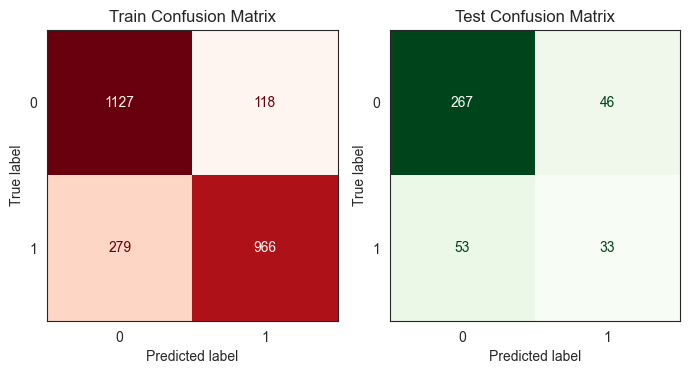

In [65]:
# predict our target with train and test data using logistic regression model
y_train_pred = model_xgb.predict(X_train_balanced)
y_test_pred = model_xgb.predict(X_test_final_df)

# find the probability of each prediction
y_train_prob = model_xgb.predict_proba(X_train_balanced)[:,1]
y_test_prob = model_xgb.predict_proba(X_test_final_df)[:,1]

# calculate the evaluation matrices
fig, axes = plt.subplots(1, 2, figsize=(7, 7))

print("="*20,"TRAINING","="*20)
print()
print(classification_report(y_train_balanced,y_train_pred,zero_division=0))
print('AUC Score Train:',roc_auc_score(y_train_balanced,y_train_prob))
print("\n")
print("="*20,"TEST","="*20)
print(classification_report(y_test,y_test_pred,zero_division=0))
print('AUC Score Test:',roc_auc_score(y_test,y_test_prob))
print("\n")

_ = ConfusionMatrixDisplay.from_predictions(y_train_balanced, y_train_pred, ax=axes[0], colorbar=False, cmap='Reds')
axes[0].set_title('Train Confusion Matrix')
axes[0].grid(False)

_ = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axes[1], colorbar=False, cmap='Greens')
axes[1].set_title('Test Confusion Matrix')
axes[1].grid(False)

plt.tight_layout()

Interestingly, XGBoost model have a really poor performance when it is predicting label `1` in data test, that is shown by the conceivably low f1 score for the label `1` and also the confusion matrix where there are a lot of false prediction when the true label is `1` but instead it is predicted as 0. To put it into perspective, we don't want any misclassification happened since it will affect heavily on our business. If we falsely default a client that is not supposed to be default then we will lose their trust, while on contrary, if we don't recognize the client that supposed to be default, it will also harm our business. Hence We will use F1 score to evaluate how good the model is since F1 is a robust evalution matrix if the data is imbalanced.

Based on the F1 score of train and test, we can say that the model is **Overfit**, because there is a big difference between the two values of F1.

About ROC AUC SCORE, apparently the result of train and test ROC AUC score is indicating an overfit situation because the difference of both ROC AUC score is reasonably big. But in this case since our target is not balanced, it is not suggested to use ROC AUC score. Similar to that, accuracy is also not the right evaluation matrix to use.

### • Model improvement

Since SVC gave the best evaluation, we will do a improvement on that model only using GridCV

In [774]:
# Train the Model using gridCV
param_grid =  {'max_depth': range (3, 21, 3),
               'n_estimators': range(60, 220, 40),
               'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1]
}

xgb_improved = GridSearchCV(XGBClassifier(), param_grid, cv=3, scoring='f1')

xgb_improved.fit(X_train_balanced, y_train_balanced);

In [775]:
# Show the best hyperparameter
print("Best parameters: ", xgb_boost.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


The best hyperparameter for our XGBoost model can be seen above

In this model evaluation we will focus on `f1-score` and `confusion matrix`

==================== TRAINING ====================

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1245
           1       0.92      0.79      0.85      1245

    accuracy                           0.86      2490
   macro avg       0.87      0.86      0.86      2490
weighted avg       0.87      0.86      0.86      2490

AUC Score Train: 0.943306720859341


==================== TEST ====================
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       313
           1       0.42      0.38      0.40        86

    accuracy                           0.75       399
   macro avg       0.63      0.62      0.62       399
weighted avg       0.75      0.75      0.75       399

AUC Score Test: 0.6191024593209006




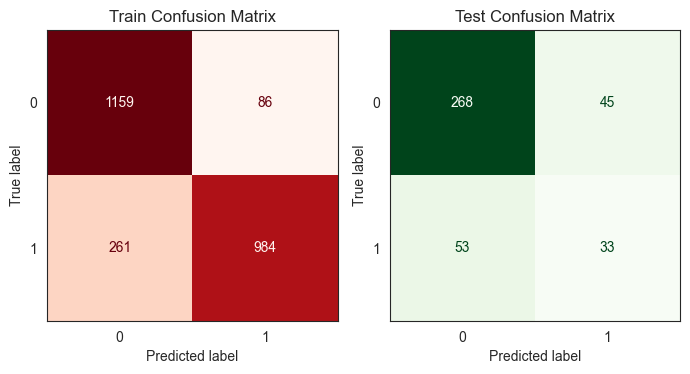

In [776]:
# predict our target with train and test data using logistic regression model
y_train_pred = xgb_improved.predict(X_train_balanced)
y_test_pred = xgb_improved.predict(X_test_final_df)

# find the probability of each prediction
y_train_prob = xgb_improved.predict_proba(X_train_balanced)[:,1]
y_test_prob = xgb_improved.predict_proba(X_test_final_df)[:,1]

# calculate the evaluation matrices
fig, axes = plt.subplots(1, 2, figsize=(7, 7))

print("="*20,"TRAINING","="*20)
print()
print(classification_report(y_train_balanced,y_train_pred,zero_division=0))
print('AUC Score Train:',roc_auc_score(y_train_balanced,y_train_prob))
print("\n")
print("="*20,"TEST","="*20)
print(classification_report(y_test,y_test_pred,zero_division=0))
print('AUC Score Test:',roc_auc_score(y_test,y_test_prob))
print("\n")

_ = ConfusionMatrixDisplay.from_predictions(y_train_balanced, y_train_pred, ax=axes[0], colorbar=False, cmap='Reds')
axes[0].set_title('Train Confusion Matrix')
axes[0].grid(False)

_ = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axes[1], colorbar=False, cmap='Greens')
axes[1].set_title('Test Confusion Matrix')
axes[1].grid(False)

plt.tight_layout()

After being improved, suprisingly there is a slight increase in f1-score for train but there is no change whatsoever in test. On the other hand, the difficulty to predict label `1` correctly is still there as can be seen in the confusion matrix where there is a plethora of misclassification on predicting label `1`. And Based on the F1 score of train and test, we can say that the model is **overfit**, since the gap between those two is quite far. All and all, we can assume that XGBoost model is limited on this performance while paired with the preprocessing that we have carried out.

## 10. Model Inference

In [777]:
df_inf.head(3)

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,target
0,200000,3,2,2,2,2,2,1
1,100000,2,2,0,0,2,2,1
2,140000,0,0,0,0,0,0,0


In [778]:
feature_num = ['limit_balance']
feature_cat = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
target = ['target']

In [779]:
# split the numerical and categorical data
df_inf_num = df_inf[feature_num]
df_inf_cat = df_inf[feature_cat]

In [780]:
# Cardinality handling
for cat in feature_cat:
    df_inf_cat[cat] = df_inf_cat[cat].replace([-2, -1], 0)
    
df_inf_cat.describe()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.600000,0.200000,0.200000,0.400000,0.400000
std,1.074968,0.966092,0.632456,0.632456,0.843274,0.843274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,1.500000,0.000000,0.000000,0.000000,0.000000
max,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [781]:
# Feature scaling
data_inf_scaled = scaler.transform(df_inf_num)
data_inf_scaled

array([[0.25675676],
       [0.12162162],
       [0.17567568],
       [0.64864865],
       [0.01351351],
       [0.09459459],
       [0.31081081],
       [0.39189189],
       [0.18918919],
       [0.32432432]])

In [782]:
# Concate Columns
data_inf_final = np.concatenate([data_inf_scaled, df_inf_cat], axis=1)

In [783]:
# Create DataFrame
df_inf_final = pd.DataFrame(data_inf_final, columns=[feature_num+feature_cat])
df_inf_final.head(3)

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.256757,3.0,2.0,2.0,2.0,2.0,2.0
1,0.121622,2.0,2.0,0.0,0.0,2.0,2.0
2,0.175676,0.0,0.0,0.0,0.0,0.0,0.0


In [784]:
# predicting the target using logistic Regression model
y_pred_inf = SVC_improved.predict(df_inf_final)
y_pred_inf

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [785]:
# make a dataframe from the prediction
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['target - Prediction'])
y_pred_inf_df

,target - Prediction
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [787]:
# Concate between Inference-Set and targets's Prediction 
pd.concat([df_inf, y_pred_inf_df], axis=1).head(3)

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,target,target - Prediction
0,200000,3,2,2,2,2,2,1,0
1,100000,2,2,0,0,2,2,1,1
2,140000,0,0,0,0,0,0,0,0


We are succeeded to do model inference.

## 11. Conclusion 

First and foremost, Being aware of the data we are dealing with is essential. The data is talking about information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. There are some insights that we can convey based on the analysis and modelling that we have done.

Just to mention, our goal for this project is to create classification model to predict the `default_payment_next_month` with the dataset provided.

There are a lot of information provided by the dataset. In our models, we consider `limit_balance` or amount of given credit because logicly if someone with a little amount of credit can easily spend more than they can pay back and on top of that, based on the calculation that we have conducted, `limit_imbalance` has an arguably significant correlation with our target. Other than `limit_balance`, All of the information about payment are also included in our model, the basis of this decision is if your payment is delayed you are prone to be default and in addition to that, the correlation between the payment and our target is meaningful based on the test that we have done.

Moving on to our goal that have been specified before. In total, we built our model with 7 different algorithms, they are Logistic Regression, SVM, Decision Tree, Random Forest, KNN, Naive Bayes and XGBoost. In order to find the most suitable algorithm to use, we do cross validation for every algorithm and evaluate their accuracy. Turns out, the best algorithm for this project is XGBoost with an accuracy score around 0.78.

Knowing the best algorithm is XGBoost, we did a model improvement on it. We tuned the hyperparameter of that algorithm and did an evaluation then compared it before it was improved. remarkably, the model cannot predict label `1` well which is the label to tell the client is going to be default next month. Due to that fact, we took a countermeasure by choosing the appropriate evaluation matrix which is F1 score to grasp the idea on how good the model is and turns out the base model is **overfit**. Although the F1 score was slightly better after being improved but evidently the model is not up to the mark as we thought as earlier which doesn't change the fact that the model is still **overfit** even after being improved.

To put it briefly, we were successful to create model to predict the `default_payment_next_month` and all out of algorithm that we have used in this project, actually XGBoost was the best even though it didn't give the best performance even after we did an improvement. Still there is always room for further analysis hence we give our suggestion to whoever wants to conduct a similar project. The first one is to find more relevant data to be used, then to do more comprehensive data preprocessing including handling the imbalance dataset with another method, better encoding, and others.

### • Conceptual Problems

#### 1. What is `criterion` in Decision Tree for? explain one criterion that you understand!

In Decision Tree, whether it is a classification or regression case. It will make some decisions based on split option of a certain attributes or features. To determine which feature to be considered as a split option, this algorithm use `Criterion`. So basically `criterion` is the way to decide what criteria and features to be used in order to split the decision.

There are some criterion available, but the one that we will discuss is entropy. Entropy is a measure of impurity, but what does it mean? let's look at the figure to understand it better

<img src="https://www.section.io/engineering-education/entropy-information-gain-machine-learning/purity.png" width="650"/> source: section.io


From the figure above, we can see that being impure means you can differentiate class red and class green and entrophy is used to determine which feature that can do it. So the higher the entrophy of a feature is, the higher the impurity of that feature also, and it is more likely for that feature to be considered in the decision tree. One more thing, entropy value is within an interval of 0 to 1 with a formula like this:

<img src="https://github.com/acothaha/picture/blob/main/entropy.PNG?raw=true" width="300"/> source: github.com


#### 2. What is the function of `pruning` in Tree based model?

Pruning is a technique to remove unnecessary sections of a tree based model to make it smaller.

<img src="https://miro.medium.com/max/1400/1*ElW-ERvIfiV6RSbs74RO_A.png" width="650"/> source: towardsdatascience.com

As can be seen above, we prune the "tree" and remove the some branches that we think is not necessary. In the practice, we prune our tree model to avoid overfitting since tree based model is very prone to be overfit. There are two ways of pruning, the first one is pre-prunning which is basically setting the max depth of our tree based model, and the other one is post-pruning, it is done after we find out our model is overfit.

#### 3. How to optimally find the value of `K` in KNN?

Before we jump into the question, we should know what is `k` in KNN. `k` in KNN is the number of nearest neighbor(s) to be considered in the prediction.
about finding the optimal value of `k`, there is no statistical method to find the right `k`. but fundamentally, we want to choose `k` so that our KNN model will have the least error. that being said, there is a drawback to that which is the case of overfitting, so in order to handle that we can use the concept of elbow method. Elbow method is when in the visualization of error rate and number of k looks like an elbow.

<img src="https://github.com/acothaha/picture/blob/main/elbow%20method.png?raw=true" width="650"/>


Above is a visualization of error rate and k-value. as can be seen, potentially the best k-value is 26 since it is the lowest point and after that the error rate is increasing, but one may say that 18 is more suitable based on the elbow method. Therefore, it will comeback to the fact that we want the best performance of our model, so testing it is the best way to go.

#### 4. Explain what do you know about `Cross Validation`?

Cross validation is an evaluation method for model. Instead of just evaluate it once, cross validation will split the data (train data) into a designated number of partition or fold. 

<img src="https://rahmadyatrias.files.wordpress.com/2020/04/041720_1702_crossvalida1.png?w=364" width="300"/>

From the picture above, using cross validation with 5 folds will build and evaluate the model based on the folds 5 times with different folds as the train data and also the validation data. By doing this, we will have a more comprehensive idea on how our model performance and stability is. 

#### 5. Explain what do you know about `Accuracy`, `Precision`, `Recall`, `F1-Score`?

`Accuracy`, `Precision`, `Recall` and `F1-Score` are evaluation matrices for classification case. Each matrix has its own functionality, let's break it down one by one:

- Accuracy : a matrix evaluation to measure how many predictions are correct both for positive and negative.

- Precision : a matrix evaluation to measure how many positive prediction are in fact positive. we focus on this matrix when we want to minimize false positive. ex: Employee access

- Recall : a matrix evaluation to measure how many prediction that supposed to be positively predicted have we classifed as positive. we focus on this matrix when we want to minimize false negative. ex: Covid detection

- F1-Score : Combination of precision and recall. Use when you want to focus minimazing both false negative and false positive.

## Source 

- Imbalanced Data 

https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data#:~:text=A%20classification%20data%20set%20with,smaller%20proportion%20are%20minority%20classes.\

- XGBoost Grid parameters

https://medium.com/@silvaan/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a

- Classification metrices

https://neptune.ai/blog/evaluation-metrics-binary-

- Entropy

https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8

- pruning

https://en.wikipedia.org/wiki/Decision_tree_pruning#:~:text=Pruning%20is%20a%20data%20compression,and%20redundant%20to%20classify%20instances.

- Elbow method

https://medium.com/@moussadoumbia_90919/elbow-method-in-supervised-learning-optimal-k-value-99d425f229e7

- Cross Validation

https://www.cs.cmu.edu/~schneide/tut5/node42.html




